Credit Card Fraud Detection

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
dataset_path = 'creditcard.csv'
df = pd.read_csv(dataset_path)
df.head(5)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [3]:
dataset_arr = df.to_numpy()
X, y = dataset_arr[:, :-1].astype(np.float64), dataset_arr[:, -1].astype(np.uint8)

In [4]:
intercept = np.ones((X.shape[0], 1))
X_b = np.concatenate((intercept, X), axis=1)

In [5]:
n_classes = np.unique(y, axis=0).shape[0]
n_samples = y.shape[0]

y_encoded = np.array([np.zeros(n_classes) for _ in range(n_samples)])
y_encoded[np.arange(n_samples), y] = 1

In [6]:
from sklearn.model_selection import train_test_split

# Parameters for splitting the dataset
val_size = 0.2     # Validation set size as a fraction of the dataset
test_size = 0.125  # Test set size as a fraction of the training set
random_state = 2   # Random state for reproducibility
is_shuffle = True  # Shuffle the dataset before splitting

# First, split the data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(
    X_b, y_encoded,
    test_size=val_size,
    random_state=random_state,
    shuffle=is_shuffle
)

# Then, split the resulting training data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(
    X_train, y_train,
    test_size=test_size,
    random_state=random_state,
    shuffle=is_shuffle
)


EPOCH 1: Training loss: 0.519, Validation loss: 0.369

EPOCH 2: Training loss: 0.273, Validation loss: 0.199

EPOCH 3: Training loss: 0.155, Validation loss: 0.122

EPOCH 4: Training loss: 0.101, Validation loss: 0.084

EPOCH 5: Training loss: 0.073, Validation loss: 0.064

EPOCH 6: Training loss: 0.057, Validation loss: 0.052

EPOCH 7: Training loss: 0.047, Validation loss: 0.043

EPOCH 8: Training loss: 0.040, Validation loss: 0.038

EPOCH 9: Training loss: 0.035, Validation loss: 0.033

EPOCH 10: Training loss: 0.032, Validation loss: 0.030

EPOCH 11: Training loss: 0.028, Validation loss: 0.027

EPOCH 12: Training loss: 0.026, Validation loss: 0.025

EPOCH 13: Training loss: 0.024, Validation loss: 0.023

EPOCH 14: Training loss: 0.022, Validation loss: 0.021

EPOCH 15: Training loss: 0.021, Validation loss: 0.020

EPOCH 16: Training loss: 0.019, Validation loss: 0.019

EPOCH 17: Training loss: 0.018, Validation loss: 0.017

EPOCH 18: Training loss: 0.017, Validation loss: 0.017



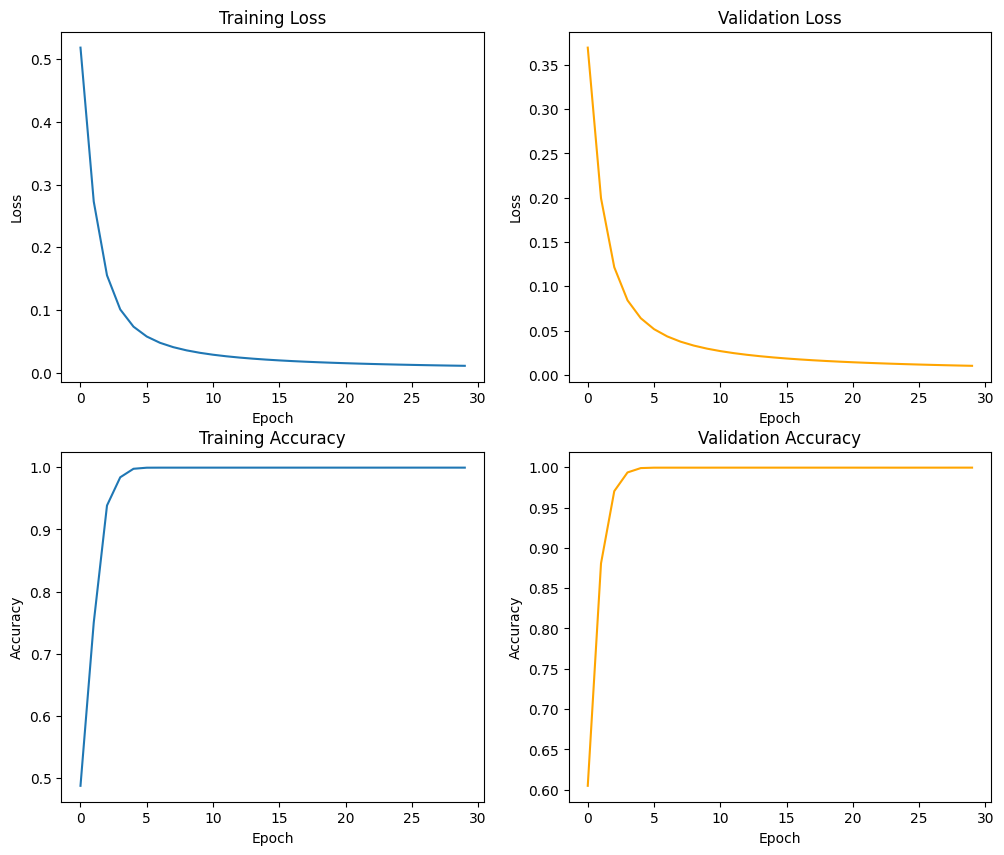

Evaluation on validation and test set:
Validation Accuracy: 1.00
Test Accuracy: 1.00


In [7]:
# Standardizing features
normalizer = StandardScaler()
X_train[:, 1:] = normalizer.fit_transform(X_train[:, 1:])
X_val[:, 1:] = normalizer.transform(X_val[:, 1:])
X_test[:, 1:] = normalizer.transform(X_test[:, 1:])

# Function to calculate softmax
def softmax(z):
    exp_z = np.exp(z)
    return exp_z / exp_z.sum(axis=1)[:, None]

# Function to make predictions
def predict(X, theta):
    z = np.dot(X, theta)
    y_hat = softmax(z)
    return y_hat

# Function to compute loss
def compute_loss(y_hat, y):
    n = y.size
    return (-1 / n) * np.sum(y * np.log(y_hat))

# Function to compute gradient
def compute_gradient(X, y, y_hat):
    n = y.size
    return np.dot(X.T, (y_hat - y)) / n

# Function to update theta parameters
def update_theta(theta, gradient, lr):
    return theta - lr * gradient

# Function to compute accuracy
def compute_accuracy(X, y, theta):
    y_hat = predict(X, theta)
    accuracy = (np.argmax(y_hat, axis=1) == np.argmax(y, axis=1)).mean()
    return accuracy

# Setting hyperparameters
lr = 0.01
epochs = 30
batch_size = 1024
n_features = X_train.shape[1]
random_state = 42  # Example random state
np.random.seed(random_state)
n_classes = y_train.shape[1]  # Number of classes based on y_train shape

# Initialize theta
theta = np.random.uniform(size=(n_features, n_classes))

# Lists to store metrics
train_losses, train_accs = [], []
val_losses, val_accs = [], []

# Training loop
for epoch in range(epochs):
    train_batch_losses, train_batch_accs = [], []
    val_batch_losses, val_batch_accs = [], []

    # Mini-batch gradient descent
    for i in range(0, X_train.shape[0], batch_size):
        X_i = X_train[i:i + batch_size]
        y_i = y_train[i:i + batch_size]

        y_hat = predict(X_i, theta)
        train_loss = compute_loss(y_hat, y_i)
        gradient = compute_gradient(X_i, y_i, y_hat)

        theta = update_theta(theta, gradient, lr)

        train_batch_losses.append(train_loss)
        train_batch_accs.append(compute_accuracy(X_i, y_i, theta))

    # Compute validation metrics
    y_val_hat = predict(X_val, theta)
    val_loss = compute_loss(y_val_hat, y_val)
    val_acc = compute_accuracy(X_val, y_val, theta)

    val_batch_losses.append(val_loss)
    val_batch_accs.append(val_acc)

    # Calculate mean losses and accuracies
    train_batch_loss = sum(train_batch_losses) / len(train_batch_losses)
    val_batch_loss = sum(val_batch_losses) / len(val_batch_losses)
    train_batch_acc = sum(train_batch_accs) / len(train_batch_accs)
    val_batch_acc = sum(val_batch_accs) / len(val_batch_accs)

    # Store metrics for plotting
    train_losses.append(train_batch_loss)
    val_losses.append(val_batch_loss)
    train_accs.append(train_batch_acc)
    val_accs.append(val_batch_acc)

    print(f'\nEPOCH {epoch + 1}: Training loss: {train_batch_loss:.3f}, Validation loss: {val_batch_loss:.3f}')

# Plotting the results
fig, ax = plt.subplots(2, 2, figsize=(12, 10))

ax[0, 0].plot(train_losses)
ax[0, 0].set(xlabel='Epoch', ylabel='Loss')
ax[0, 0].set_title('Training Loss')

ax[0, 1].plot(val_losses, 'orange')
ax[0, 1].set(xlabel='Epoch', ylabel='Loss')
ax[0, 1].set_title('Validation Loss')

ax[1, 0].plot(train_accs)
ax[1, 0].set(xlabel='Epoch', ylabel='Accuracy')
ax[1, 0].set_title('Training Accuracy')

ax[1, 1].plot(val_accs, 'orange')
ax[1, 1].set(xlabel='Epoch', ylabel='Accuracy')
ax[1, 1].set_title('Validation Accuracy')

plt.show()

# Final evaluation on validation and test sets
val_set_acc = compute_accuracy(X_val, y_val, theta)
test_set_acc = compute_accuracy(X_test, y_test, theta)
print('Evaluation on validation and test set:')
print(f'Validation Accuracy: {val_set_acc:.2f}')
print(f'Test Accuracy: {test_set_acc:.2f}')

Twitter Sentiment Analysis

In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import re
import nltk

# Download NLTK stopwords
nltk.download('stopwords')

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.corpus import stopwords
from nltk.stem import SnowballStemmer

# Load the dataset
dataset_path = 'Twitter_Data.csv'
df_tw = pd.read_csv(dataset_path)

# Display the DataFrame
print(df_tw)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


                                               clean_text  category
0       when modi promised “minimum government maximum...      -1.0
1       talk all the nonsense and continue all the dra...       0.0
2       what did just say vote for modi  welcome bjp t...       1.0
3       asking his supporters prefix chowkidar their n...       1.0
4       answer who among these the most powerful world...       1.0
...                                                   ...       ...
162975  why these 456 crores paid neerav modi not reco...      -1.0
162976  dear rss terrorist payal gawar what about modi...      -1.0
162977  did you cover her interaction forum where she ...       0.0
162978  there big project came into india modi dream p...       0.0
162979  have you ever listen about like gurukul where ...       1.0

[162980 rows x 2 columns]


In [13]:
def text_normalize(text):
    # Lowercasing
    text = text.lower()

    # Retweet old acronym "RT" removal
    text = re.sub(r'^rt[\s]+', '', text)

    # Hyperlinks removal
    text = re.sub(r'https?:\/\/.*[\r\n]*', '', text)

    # Punctuation removal
    text = re.sub(r'[^\w\s]', '', text)

    # Remove stopwords
    stop_words = set(stopwords.words('english'))
    words = text.split()
    words = [word for word in words if word not in stop_words]
    text = ' '.join(words)

    # Stemming
    stemmer = SnowballStemmer('english')
    words = text.split()
    words = [stemmer.stem(word) for word in words]
    text = ' '.join(words)

    return text

# Vectorization
vectorizer = TfidfVectorizer(max_features=2000)
# Remove rows with NaN values in the 'clean_text' column
df_tw = df_tw.dropna(subset=['clean_text'])
X = vectorizer.fit_transform(df_tw['clean_text']).toarray()

# Add intercept
intercept = np.ones((X.shape[0], 1))
X_b = np.concatenate((intercept, X), axis=1)

n_classes = df_tw['category'].nunique()
n_samples = df_tw['category'].size

# Encode target variable
y = df_tw['category'].to_numpy() + 1
y = y.astype(np.uint8)
y_encoded = np.array([np.zeros(n_classes) for _ in range(n_samples)])
y_encoded[np.arange(n_samples), y] = 1

# Train-Validation-Test split sizes
val_size = 0.2
test_size = 0.125
random_state = 2
is_shuffle = True

X_train, X_val, y_train, y_val = train_test_split(
    X_b, y_encoded,
    test_size=val_size,
    random_state=random_state,
    shuffle=is_shuffle
)

X_train, X_test, y_train, y_test = train_test_split(
    X_train, y_train,
    test_size=test_size,
    random_state=random_state,
    shuffle=is_shuffle
)

# Logistic Regression with Softmax function and Batch Gradient Descent
def softmax(z):
    exp_z = np.exp(z)
    return exp_z / exp_z.sum(axis=1)[:, None]

def compute_loss(y_hat, y):
    n = y.size
    return (-1 / n) * np.sum(y * np.log(y_hat))

def predict(X, theta):
    z = np.dot(X, theta)
    y_hat = softmax(z)
    return y_hat

def compute_gradient(X, y, y_hat):
    n = y.size
    return np.dot(X.T, (y_hat - y)) / n

def update_theta(theta, gradient, lr):
    return theta - lr * gradient

def compute_accuracy(X, y, theta):
    y_hat = predict(X, theta)
    acc = (np.argmax(y_hat, axis=1) == np.argmax(y, axis=1)).mean()
    return acc

# Hyperparameters
lr = 0.1
epochs = 200
batch_size = X_train.shape[0]
n_features = X_train.shape[1]

# Initialize random theta
np.random.seed(random_state)
theta = np.random.uniform(size=(n_features, n_classes))

# Compute and print accuracies
val_set_acc = compute_accuracy(X_val, y_val, theta)
test_set_acc = compute_accuracy(X_test, y_test, theta)
print('Evaluation on validation and test set:')
print(f'Validation Accuracy: {val_set_acc:.2f}')
print(f'Test Accuracy: {test_set_acc:.2f}')

<ipython-input-13-3342289ab194>:43: RuntimeWarning: invalid value encountered in cast
  y = y.astype(np.uint8)


Evaluation on validation and test set:
Validation Accuracy: 0.36
Test Accuracy: 0.35


TN CÂU 5

In [14]:
import numpy as np

# Dự đoán của mô hình
y_hat = np.array([0.4, 0.15, 0.05, 0.4])

# Nhãn thực tế
y = np.array([1, 0, 0, 0])

# Tính loss cross-entropy
cross_entropy_loss = -np.sum(y * np.log(y_hat))

# Làm tròn đến hàng thập phân thứ 3
cross_entropy_loss_rounded = round(cross_entropy_loss, 3)

print(f'Cross-Entropy Loss: {cross_entropy_loss_rounded}')

Cross-Entropy Loss: 0.916


TN CÂU 6

In [15]:
# Bộ giá trị tuyến tính Z
Z = np.array([-1, -2, 3, 2])

# Tính giá trị hàm Softmax
exp_Z = np.exp(Z)
softmax_values = exp_Z / np.sum(exp_Z)

# Làm tròn đến hàng thập phân thứ 3
softmax_values_rounded = np.round(softmax_values, 3)

print(f'Bộ giá trị xác suất đầu ra: {softmax_values_rounded}')

Bộ giá trị xác suất đầu ra: [0.013 0.005 0.718 0.264]


TN CÂU 7

In [16]:
# Dự đoán của mô hình
y_hat = np.array([0, 1, 3, 2, 0, 2, 1, 2])

# Nhãn thực tế
y = np.array([0, 0, 3, 2, 1, 2, 2, 1])

# Tính độ chính xác
accuracy = np.mean(y_hat == y)

# Quy đổi sang phần trăm
accuracy_percentage = accuracy * 100

print(f'Accuracy: {accuracy_percentage}%')

Accuracy: 50.0%
